In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
#read table 27 
df = pd.read_csv('clean_table_27.csv')
df.head()

,Category Marker,Category,Country of HE Provider,Academic contract marker,Activity standard occupational classification,Number,Academic Year
0,Age Group,25 and under,England,Academic contract,Professional occupations,4245,2014/15
1,Age Group,25 and under,England,Academic contract,Associate professional and technical occupations,60,2014/15
2,Age Group,25 and under,England,Non-academic contract,"Managers, directors and senior officials",45,2014/15
3,Age Group,25 and under,England,Non-academic contract,Professional occupations,1160,2014/15
4,Age Group,25 and under,England,Non-academic contract,Associate professional and technical occupations,3560,2014/15


In [3]:
#copy the dataframe into another vairable
df_copy =df.copy()

In [4]:
#rename the columns
df_copy.rename(columns = {'Category Marker':'Category_Marker', 'Country of HE Provider':'Country', 'Academic contract marker':'Academic_contract_marker','Activity standard occupational classification':'Occupational_Classification'}, inplace = True)
df_copy.head()

,Category_Marker,Category,Country,Academic_contract_marker,Occupational_Classification,Number,Academic Year
0,Age Group,25 and under,England,Academic contract,Professional occupations,4245,2014/15
1,Age Group,25 and under,England,Academic contract,Associate professional and technical occupations,60,2014/15
2,Age Group,25 and under,England,Non-academic contract,"Managers, directors and senior officials",45,2014/15
3,Age Group,25 and under,England,Non-academic contract,Professional occupations,1160,2014/15
4,Age Group,25 and under,England,Non-academic contract,Associate professional and technical occupations,3560,2014/15


In [5]:
#check for the unique values in the category_maker column
df_copy.Category_Marker.unique()

array(['Age Group', 'Disability status', 'Ethnicity', 'Nationality',
       'Sex'], dtype=object)

In [6]:
df_copy.Category.unique()

array(['25 and under', '26-35', '36-45', '46-55', '56-65', '66 and over',
       'Known to have a disability', 'No known disability', 'White',
       'Black', 'Asian', 'Mixed', 'Other', 'Not known', 'UK',
       'European Union', 'Non-European Union', 'Female', 'Male'],
      dtype=object)

In [7]:
#extract data for Age group
df_Age =df_copy.query("Category_Marker == 'Age Group'")
df_Age.head()

,Category_Marker,Category,Country,Academic_contract_marker,Occupational_Classification,Number,Academic Year
0,Age Group,25 and under,England,Academic contract,Professional occupations,4245,2014/15
1,Age Group,25 and under,England,Academic contract,Associate professional and technical occupations,60,2014/15
2,Age Group,25 and under,England,Non-academic contract,"Managers, directors and senior officials",45,2014/15
3,Age Group,25 and under,England,Non-academic contract,Professional occupations,1160,2014/15
4,Age Group,25 and under,England,Non-academic contract,Associate professional and technical occupations,3560,2014/15


In [12]:
df_Age.shape

(1809, 7)

In [17]:
#group the age group
Uni_occupation_age =df_Age.groupby(['Occupational_Classification','Category_Marker'])['Number'].sum().sort_values(ascending=False).reset_index()
Uni_occupation_age

,Occupational_Classification,Category_Marker,Number
0,Professional occupations,Age Group,1772430
1,Administrative and secretarial occupations,Age Group,470185
2,Associate professional and technical occupations,Age Group,336850
3,Elementary occupations,Age Group,163140
4,"Managers, directors and senior officials",Age Group,78595
5,"Caring, leisure and other service occupations",Age Group,48260
6,Skilled trades occupations,Age Group,43945
7,Sales and customer service occupations,Age Group,15410
8,"Process, plant and machine operatives",Age Group,10340
9,Clerical and manual occupations,Age Group,15


<AxesSubplot:xlabel='Occupational_Classification'>

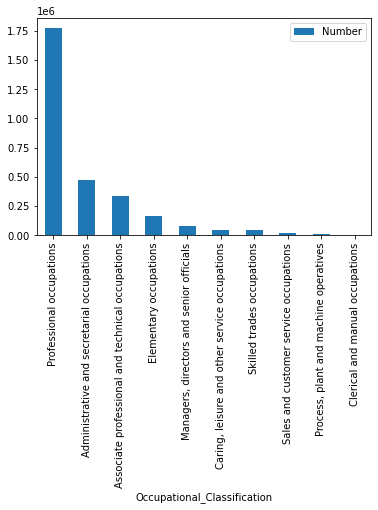

In [18]:
Uni_occupation_age.plot(kind="bar",x="Occupational_Classification")

In [20]:
Uni_occupation_age_category =df_Age.groupby(['Occupational_Classification','Category'])['Number'].sum().unstack(fill_value=0).reset_index()
Uni_occupation_age_category

Category,Occupational_Classification,25 and under,26-35,36-45,46-55,56-65,66 and over
0,Administrative and secretarial occupations,50420,131125,113170,106760,63345,5365
1,Associate professional and technical occupations,29185,97310,91520,74935,40945,2955
2,"Caring, leisure and other service occupations",8270,11275,8220,10685,8745,1065
3,Clerical and manual occupations,0,10,0,5,0,0
4,Elementary occupations,20775,21630,26330,45935,42105,6365
5,"Managers, directors and senior officials",345,9090,24270,29825,14310,755
6,"Process, plant and machine operatives",580,1455,1905,3140,2870,390
7,Professional occupations,52265,455435,504240,444885,262080,53525
8,Sales and customer service occupations,2990,4210,2875,3010,2135,190
9,Skilled trades occupations,3405,7625,9575,12810,9895,635


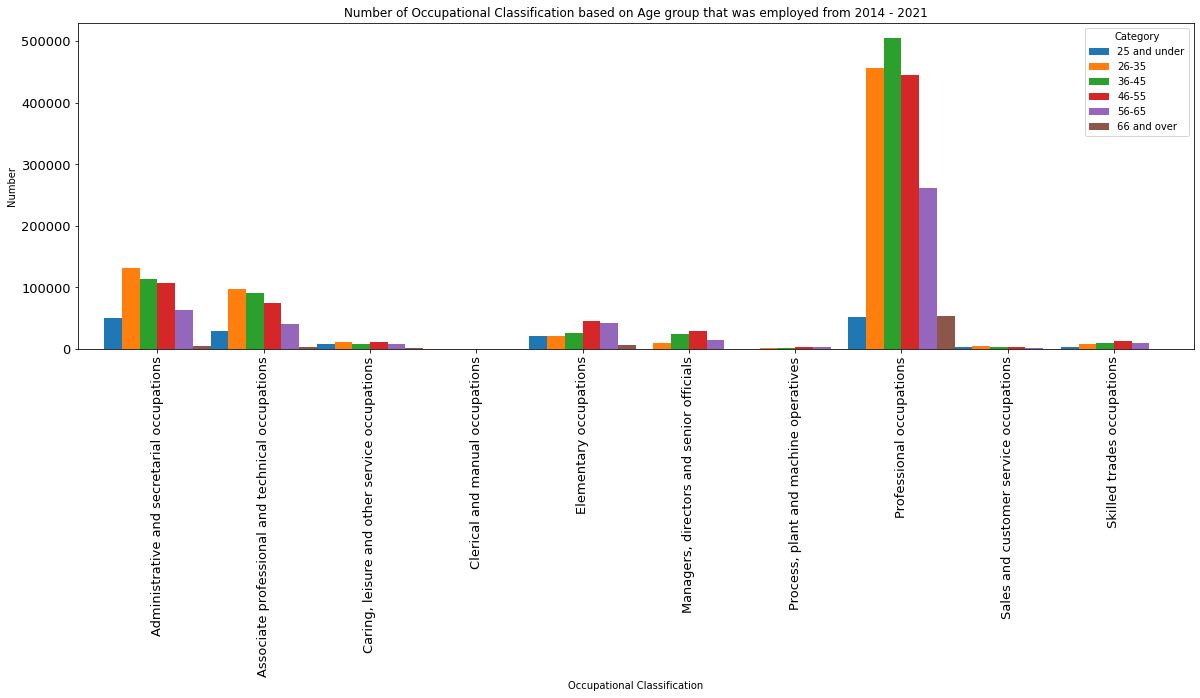

In [23]:
Uni_occupation_age_category.plot(kind='bar',x="Occupational_Classification", figsize = (20,6),fontsize=13, width =1)
plt.xlabel('Occupational Classification')
plt.ylabel('Number')
plt.title("Number of Occupational Classification based on Age group that was employed from 2014 - 2021")
plt.show()

In [24]:
#based on Academic contractmarker
#find the unique values of this column
df_copy.Academic_contract_marker.unique()

array(['Academic contract', 'Non-academic contract'], dtype=object)

In [25]:
university_contract_type =df_Age.groupby(['Academic_contract_marker','Category'])["Number"].sum().unstack(fill_value=0).reset_index()
university_contract_type

Category,Academic_contract_marker,25 and under,26-35,36-45,46-55,56-65,66 and over
0,Academic contract,42015,386850,408215,367595,227935,51465
1,Non-academic contract,126220,352315,373890,364395,218495,19780


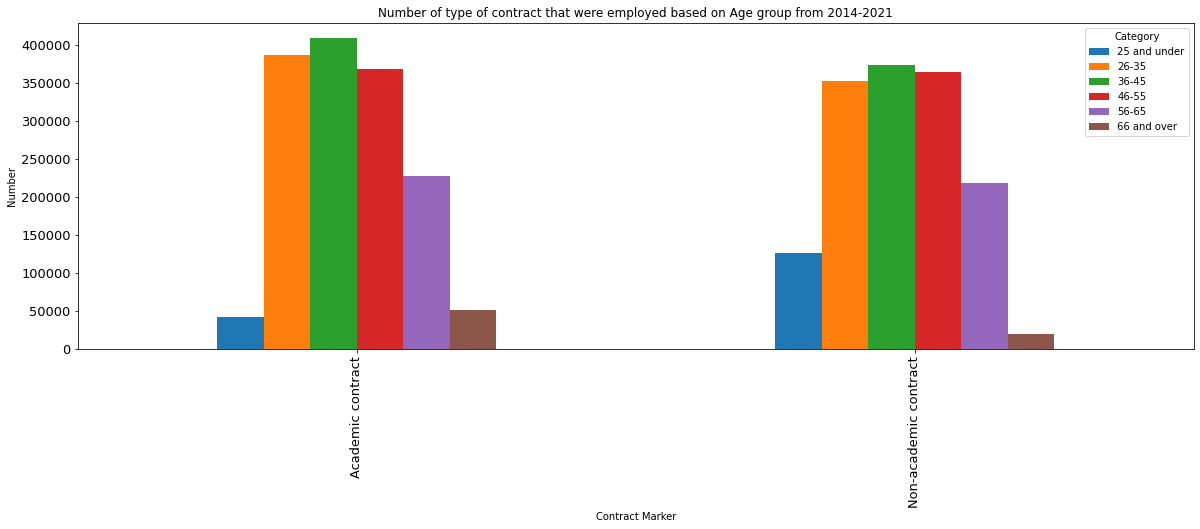

In [28]:
university_contract_type.plot(kind='bar',x="Academic_contract_marker", figsize = (20,6),fontsize=13)
plt.xlabel('Contract Marker')
plt.ylabel('Number')
plt.title("Number of type of contract that were employed based on Age group from 2014-2021")
plt.show()

In [30]:
#select based on disability status
df_disability =df_copy.query("Category_Marker =='Disability status'")
df_disability.head()

,Category_Marker,Category,Country,Academic_contract_marker,Occupational_Classification,Number,Academic Year
1809,Disability status,Known to have a disability,England,Academic contract,"Managers, directors and senior officials",20,2014/15
1810,Disability status,Known to have a disability,England,Academic contract,Professional occupations,6515,2014/15
1811,Disability status,Known to have a disability,England,Academic contract,Associate professional and technical occupations,80,2014/15
1812,Disability status,Known to have a disability,England,Non-academic contract,"Managers, directors and senior officials",375,2014/15
1813,Disability status,Known to have a disability,England,Non-academic contract,Professional occupations,1625,2014/15


In [31]:
df_disability.shape

(644, 7)

In [38]:
university_disability_highest =df_disability.groupby(['Occupational_Classification','Category_Marker'])['Number'].sum().sort_values(ascending=False).reset_index()
university_disability_highest

,Occupational_Classification,Category_Marker,Number
0,Professional occupations,Disability status,1772405
1,Administrative and secretarial occupations,Disability status,470170
2,Associate professional and technical occupations,Disability status,336840
3,Elementary occupations,Disability status,163170
4,"Managers, directors and senior officials",Disability status,78620
5,"Caring, leisure and other service occupations",Disability status,48270
6,Skilled trades occupations,Disability status,43965
7,Sales and customer service occupations,Disability status,15430
8,"Process, plant and machine operatives",Disability status,10400
9,Clerical and manual occupations,Disability status,50


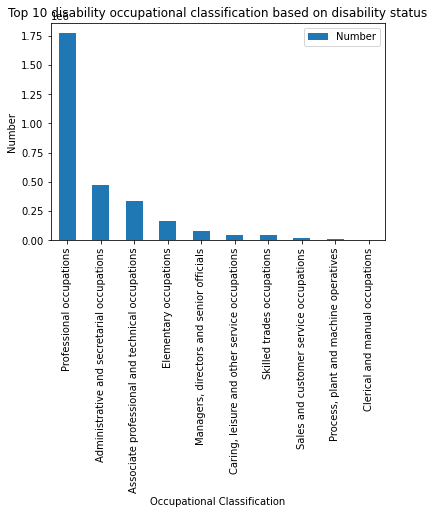

In [39]:
university_disability_highest.plot(kind='bar',x ='Occupational_Classification')
plt.title('Top 10 disability occupational classification based on disability status')
plt.xlabel('Occupational Classification')
plt.ylabel('Number')
plt.show()

In [45]:
university_disability_category =df_disability.groupby(['Occupational_Classification','Category'])['Number'].sum().unstack(fill_value=0).reset_index()
university_disability_category                                                  

Category,Occupational_Classification,Known to have a disability,No known disability
0,Administrative and secretarial occupations,30085,440085
1,Associate professional and technical occupations,20625,316215
2,"Caring, leisure and other service occupations",2590,45680
3,Clerical and manual occupations,0,50
4,Elementary occupations,8980,154190
5,"Managers, directors and senior officials",3500,75120
6,"Process, plant and machine operatives",455,9945
7,Professional occupations,79625,1692780
8,Sales and customer service occupations,1135,14295
9,Skilled trades occupations,2140,41825


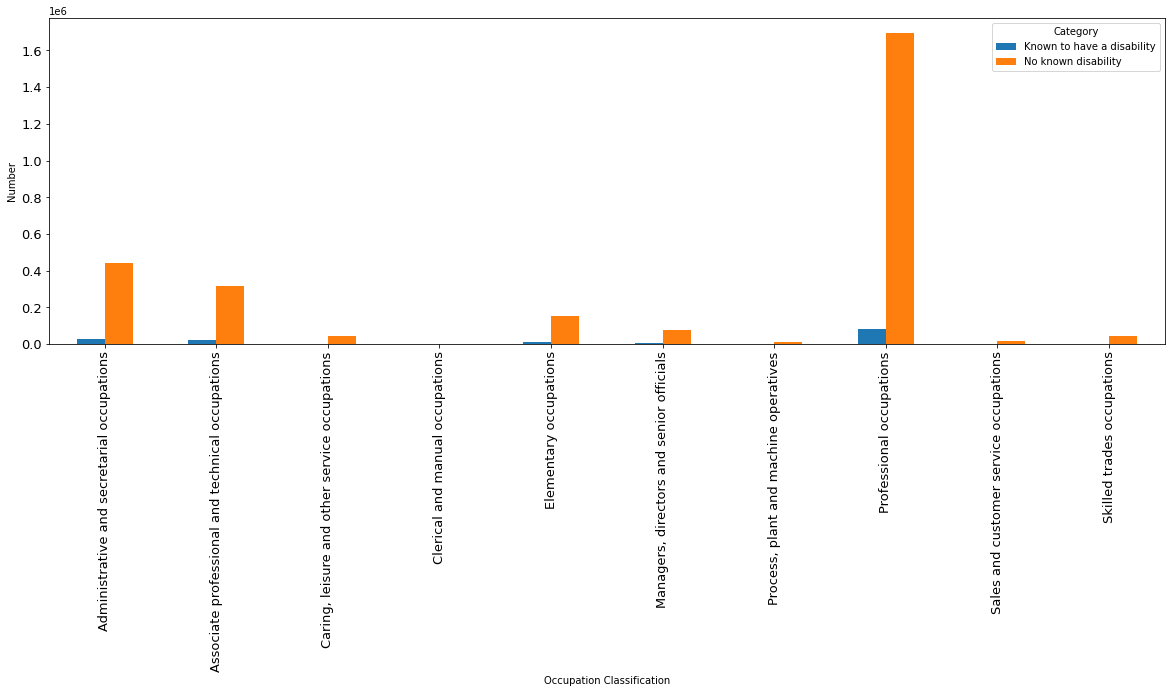

In [57]:
university_disability_category.plot(kind='bar',x="Occupational_Classification",figsize = (20,6),fontsize=13)

plt.xlabel("Occupation Classification")

plt.ylabel("Number")

plt.show()
                            

In [48]:
#disability based on academic contract
university_disability_contract =df_disability.groupby(['Academic_contract_marker','Category'])['Number'].sum().unstack(fill_value=0).reset_index()
university_disability_contract       

Category,Academic_contract_marker,Known to have a disability,No known disability
0,Academic contract,63775,1420315
1,Non-academic contract,85360,1369870


TypeError: 'str' object is not callable

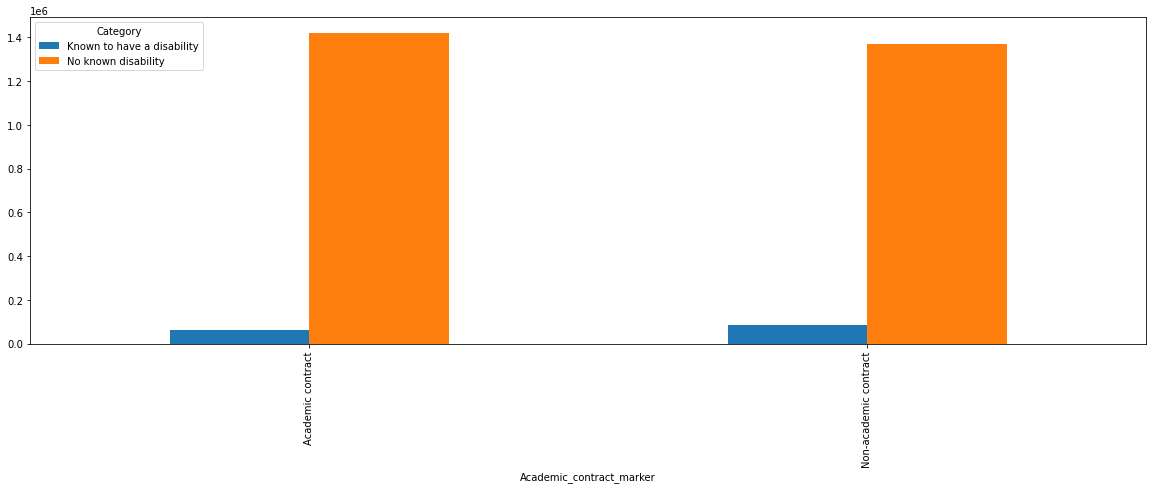

In [61]:
university_disability_contract.plot(kind ='bar',x ='Academic_contract_marker',figsize = (20,6))
plt.title("Disability status based on contract type")
plt.xlabel("Academic Contract Marker")
plt.ylabel("Number")
plt.show()

In [62]:
#extract for ethnicity
df_ethnicity =df_copy.query("Category_Marker=='Ethnicity'")
df_ethnicity.head()

,Category_Marker,Category,Country,Academic_contract_marker,Occupational_Classification,Number,Academic Year
2453,Ethnicity,White,England,Academic contract,"Managers, directors and senior officials",265,2014/15
2454,Ethnicity,White,England,Academic contract,Professional occupations,128665,2014/15
2455,Ethnicity,White,England,Academic contract,Associate professional and technical occupations,835,2014/15
2456,Ethnicity,White,England,Academic contract,Clerical and manual occupations,5,2014/15
2457,Ethnicity,White,England,Non-academic contract,"Managers, directors and senior officials",8275,2014/15


In [63]:
df_ethnicity.shape

(1448, 7)

In [64]:
university_ethnicity_category =df_ethnicity.groupby(['Occupational_Classification','Category'])['Number'].sum().unstack(fill_value = 0).reset_index()
university_ethnicity_category

Category,Occupational_Classification,Asian,Black,Mixed,Not known,Other,White
0,Administrative and secretarial occupations,26715,13075,8950,22720,3185,395530
1,Associate professional and technical occupations,20665,8075,6350,17035,2730,281930
2,"Caring, leisure and other service occupations",1590,2080,895,2945,445,40305
3,Clerical and manual occupations,0,0,0,0,0,40
4,Elementary occupations,10325,10695,2795,12000,1925,125415
5,"Managers, directors and senior officials",2635,1120,940,3285,340,70235
6,"Process, plant and machine operatives",255,245,65,1180,50,8590
7,Professional occupations,151850,33120,34215,138115,32160,1382920
8,Sales and customer service occupations,1215,785,370,830,130,12075
9,Skilled trades occupations,985,995,460,2965,280,38230


<AxesSubplot:xlabel='Occupational_Classification'>

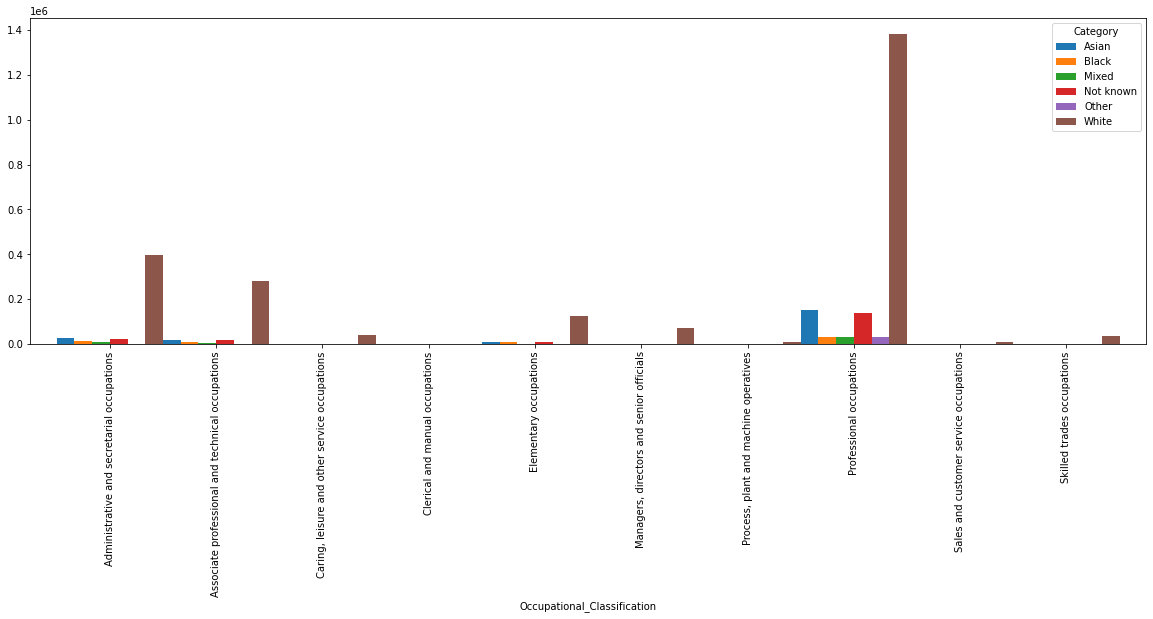

In [68]:
university_ethnicity_category.plot(kind ='bar',x ='Occupational_Classification',figsize = (20,6), width=1)

In [69]:
university_ethnicity_category2 =df_ethnicity.groupby(['Academic_contract_marker','Category'])['Number'].sum().unstack(fill_value = 0).reset_index()
university_ethnicity_category2

Category,Academic_contract_marker,Asian,Black,Mixed,Not known,Other,White
0,Academic contract,134505,27465,29265,123345,29770,1139680
1,Non-academic contract,81730,42725,25775,77730,11475,1215590


<AxesSubplot:xlabel='Academic_contract_marker'>

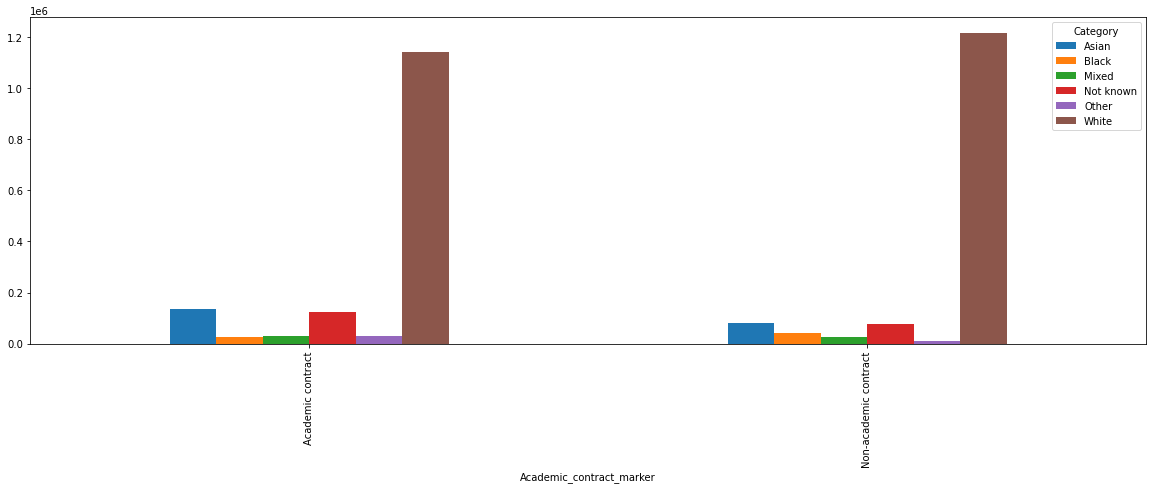

In [70]:
university_ethnicity_category2.plot(kind='bar',x ='Academic_contract_marker',figsize = (20,6))

In [72]:
df_sex = df_copy.query("Category_Marker =='Sex'")
df_sex.head()

,Category_Marker,Category,Country,Academic_contract_marker,Occupational_Classification,Number,Academic Year
5018,Sex,Female,England,Academic contract,"Managers, directors and senior officials",125,2014/15
5019,Sex,Female,England,Academic contract,Professional occupations,73890,2014/15
5020,Sex,Female,England,Academic contract,Associate professional and technical occupations,450,2014/15
5021,Sex,Female,England,Academic contract,Clerical and manual occupations,5,2014/15
5022,Sex,Female,England,Non-academic contract,"Managers, directors and senior officials",4935,2014/15


In [73]:
university_sex =df_sex.groupby(['Occupational_Classification','Category_Marker'])['Number'].sum().sort_values(ascending =False).reset_index()
university_sex

,Occupational_Classification,Category_Marker,Number
0,Professional occupations,Sex,1772390
1,Administrative and secretarial occupations,Sex,470160
2,Associate professional and technical occupations,Sex,336815
3,Elementary occupations,Sex,163165
4,"Managers, directors and senior officials",Sex,78610
5,"Caring, leisure and other service occupations",Sex,48280
6,Skilled trades occupations,Sex,43965
7,Sales and customer service occupations,Sex,15425
8,"Process, plant and machine operatives",Sex,10380
9,Clerical and manual occupations,Sex,40


<AxesSubplot:xlabel='Occupational_Classification'>

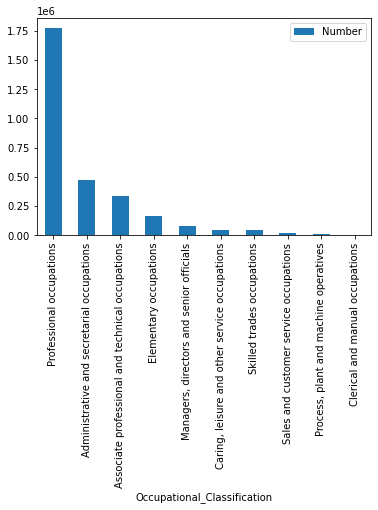

In [75]:
university_sex.plot(kind ='bar', x='Occupational_Classification')

In [76]:
university_sex_category =df_sex.groupby(['Occupational_Classification','Category'])['Number'].sum().unstack(fill_value=0).reset_index()
university_sex_category

Category,Occupational_Classification,Female,Male,Other
0,Administrative and secretarial occupations,376295,93645,220
1,Associate professional and technical occupations,183100,153530,185
2,"Caring, leisure and other service occupations",27050,21225,5
3,Clerical and manual occupations,30,10,0
4,Elementary occupations,94175,68965,25
5,"Managers, directors and senior officials",41915,36685,10
6,"Process, plant and machine operatives",1870,8510,0
7,Professional occupations,849900,921445,1045
8,Sales and customer service occupations,10495,4930,0
9,Skilled trades occupations,9070,34890,5


<AxesSubplot:xlabel='Occupational_Classification'>

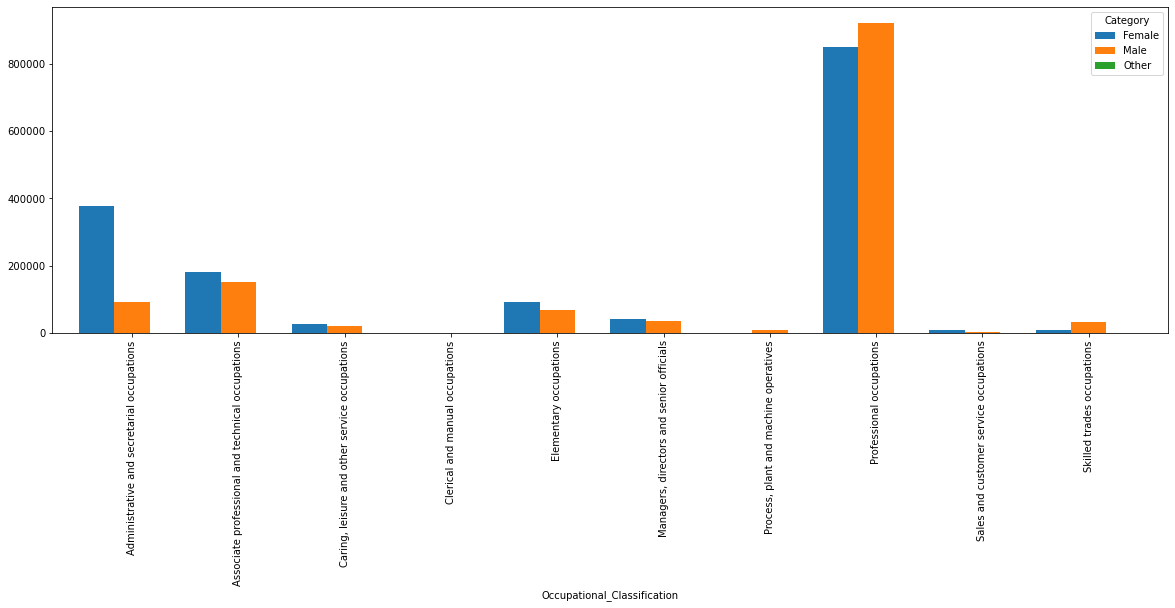

In [80]:
university_sex_category.plot(kind='bar', x ='Occupational_Classification', figsize =(20,6), width =1)

In [81]:
university_sex_category2 =df_sex.groupby(['Academic_contract_marker','Category'])['Number'].sum().unstack(fill_value=0).reset_index()
university_sex_category2

Category,Academic_contract_marker,Female,Male,Other
0,Academic contract,682360,800870,845
1,Non-academic contract,911540,542965,650


<AxesSubplot:xlabel='Academic_contract_marker'>

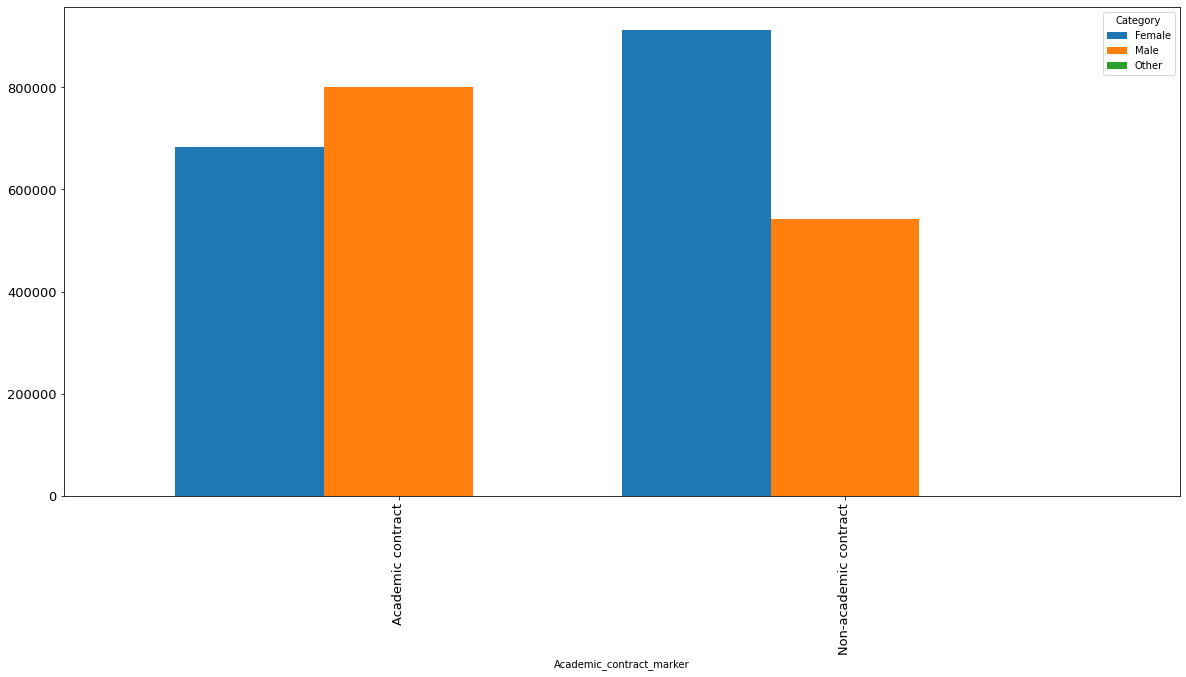

In [84]:
university_sex_category2.plot(kind='bar', x ='Academic_contract_marker', figsize =(20,9), width =1, fontsize =13)

In [86]:
df_nationality = df_copy.query("Category_Marker == 'Nationality'")
df_nationality.head()

,Category_Marker,Category,Country,Academic_contract_marker,Occupational_Classification,Number,Academic Year
3901,Nationality,UK,England,Academic contract,"Managers, directors and senior officials",270,2014/15
3902,Nationality,UK,England,Academic contract,Professional occupations,114085,2014/15
3903,Nationality,UK,England,Academic contract,Associate professional and technical occupations,870,2014/15
3904,Nationality,UK,England,Academic contract,Clerical and manual occupations,5,2014/15
3905,Nationality,UK,England,Non-academic contract,"Managers, directors and senior officials",8625,2014/15


In [87]:
university_nationality =df_nationality.groupby(['Occupational_Classification','Category'])["Number"].sum().unstack(fill_value =0).reset_index()
university_nationality

Category,Occupational_Classification,European Union,Non-European Union,Not known,UK
0,Administrative and secretarial occupations,28670,15750,2905,422840
1,Associate professional and technical occupations,20905,11840,2535,301530
2,"Caring, leisure and other service occupations",3245,1560,590,42895
3,Clerical and manual occupations,0,0,0,40
4,Elementary occupations,16285,10805,1675,134410
5,"Managers, directors and senior officials",3045,1630,355,73560
6,"Process, plant and machine operatives",705,265,520,8885
7,Professional occupations,273310,208675,17210,1273225
8,Sales and customer service occupations,1160,620,140,13480
9,Skilled trades occupations,2410,940,560,40060


<AxesSubplot:xlabel='Occupational_Classification'>

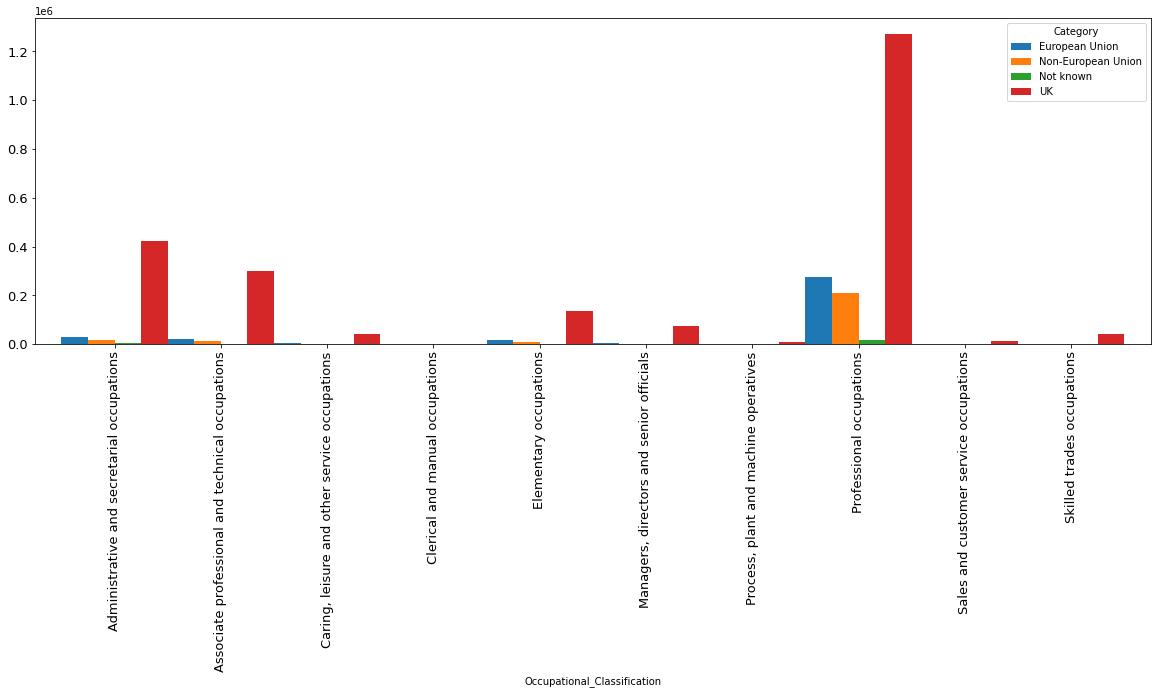

In [88]:
university_nationality.plot(kind ='bar',x ='Occupational_Classification',figsize=(20,6),fontsize =13, width =1)

In [89]:
university_nationality2 =df_nationality.groupby(['Academic_contract_marker','Category'])["Number"].sum().unstack(fill_value =0).reset_index()
university_nationality2

Category,Academic_contract_marker,European Union,Non-European Union,Not known,UK
0,Academic contract,253255,195835,15500,1019490
1,Non-academic contract,96480,56250,10990,1291435


<AxesSubplot:xlabel='Academic_contract_marker'>

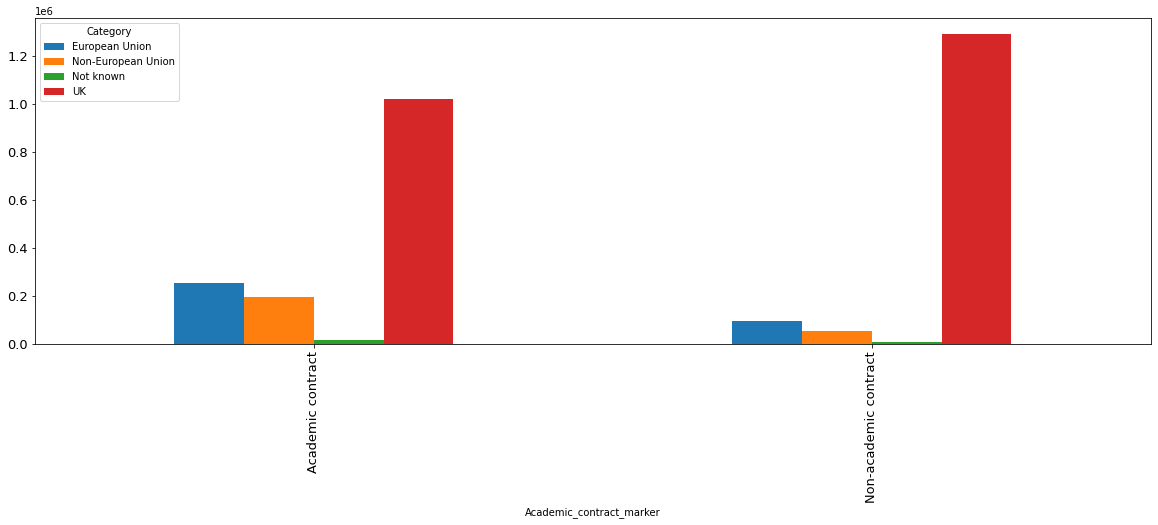

In [91]:
university_nationality2.plot(kind='bar',x ='Academic_contract_marker',figsize =(20,6), fontsize =13)